In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv ")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
#What is the overall on-time performance

In [5]:
early = wego["ADJUSTED_EARLY_COUNT"].sum()
late = wego["ADJUSTED_LATE_COUNT"].sum()
ontime = wego["ADJUSTED_ONTIME_COUNT"].sum()
total = early + late + ontime
total

338861

In [6]:
wego.shape

(350329, 30)

In [7]:
ontimepercent = round ((ontime / total)* 100, 2)   
ontimepercent

79.69

In [8]:
earlypercent = round ((early / total)* 100, 2)  
earlypercent

2.88

In [9]:
latepercent = round ((late / total)* 100, 2)  
latepercent

17.42

In [10]:
#below is Isabelle's
#Isabelle's looks to be more accurate

In [11]:
on_time_performance = wego.loc[wego['ADJUSTED_ONTIME_COUNT'] == 1]
#on_time_performance = on_time_performance.loc[on_time_performance['TRIP_EDGE'] !=2]
on_time_performance = round((len(on_time_performance) / len(wego)) * 100, 2)
on_time_performance

77.08

In [12]:
#what do the overall distribution of adherence look like?

In [13]:
wego['ROUTE_ABBR'].unique()

array([22, 23,  3,  7, 50, 52, 55, 56], dtype=int64)

In [14]:
#routes = [3, 7, 22, 23, 50, 52, 53, 55, 56]
#filtering = wego[wego['ROUTE_ABBR'].isin(routes)]
route_totals = wego.groupby('ROUTE_ABBR')['ADHERENCE'].mean()
print(route_totals)

ROUTE_ABBR
3    -3.761491
7    -3.346555
22   -1.138107
23   -1.760110
50   -2.505022
52   -3.971342
55   -4.823302
56   -2.703988
Name: ADHERENCE, dtype: float64


In [15]:
#How does direction of travel, route, or location affect the on-time performance?

In [16]:
#used same code as Jacob for finding adherance distribution 

In [17]:
wego['ROUTE_DIRECTION_NAME'].unique()

array(['TO DOWNTOWN', 'FROM DOWNTOWN'], dtype=object)

In [18]:
direction = ['TO DOWNTOWN', 'FROM DOWNTOWN']
filteringdirection = wego[wego['ROUTE_DIRECTION_NAME'].isin(direction)]
direction_totals = filteringdirection.groupby('ROUTE_DIRECTION_NAME')['ADHERENCE'].mean()
print(direction_totals)

ROUTE_DIRECTION_NAME
FROM DOWNTOWN   -3.960287
TO DOWNTOWN     -2.321804
Name: ADHERENCE, dtype: float64


In [19]:
#tried simple code for direction of travel affect on on-time performance 

In [20]:
ontime_by_direction = round((wego.groupby('ROUTE_DIRECTION_NAME')['ADJUSTED_ONTIME_COUNT'].sum()/len(wego))*100)      
ontime_by_direction

ROUTE_DIRECTION_NAME
FROM DOWNTOWN    38.0
TO DOWNTOWN      39.0
Name: ADJUSTED_ONTIME_COUNT, dtype: float64

In [21]:
early_by_direction = round((wego.groupby('ROUTE_DIRECTION_NAME')['ADJUSTED_EARLY_COUNT'].sum()/total)*100)
early_by_direction

ROUTE_DIRECTION_NAME
FROM DOWNTOWN    2.0
TO DOWNTOWN      1.0
Name: ADJUSTED_EARLY_COUNT, dtype: float64

In [22]:
late_by_direction = round((wego.groupby('ROUTE_DIRECTION_NAME')['ADJUSTED_LATE_COUNT'].sum()/total)*100)
late_by_direction

ROUTE_DIRECTION_NAME
FROM DOWNTOWN    12.0
TO DOWNTOWN       6.0
Name: ADJUSTED_LATE_COUNT, dtype: float64

In [23]:
directiontotal = (ontime_by_direction + early_by_direction + late_by_direction)
directiontotal

ROUTE_DIRECTION_NAME
FROM DOWNTOWN    52.0
TO DOWNTOWN      46.0
dtype: float64

In [24]:
ontimebydirection = ontime_by_direction / directiontotal
ontimebydirection

ROUTE_DIRECTION_NAME
FROM DOWNTOWN    0.730769
TO DOWNTOWN      0.847826
dtype: float64

In [25]:
# route, or location affect the on-time performance?

In [26]:
route = wego.groupby(['ROUTE_ABBR','ROUTE_DIRECTION_NAME']).agg({'ADJUSTED_ONTIME_COUNT': 'sum','ADJUSTED_EARLY_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT':'sum'})
route

ADJUSTED_ONTIME_COUNT  ADJUSTED_EARLY_COUNT  \
ROUTE_ABBR ROUTE_DIRECTION_NAME                                                
3          FROM DOWNTOWN                         15447                   639   
           TO DOWNTOWN                           19069                   743   
7          FROM DOWNTOWN                          6542                   298   
           TO DOWNTOWN                            6875                   135   
22         FROM DOWNTOWN                         11008                   373   
           TO DOWNTOWN                           11484                   258   
23         FROM DOWNTOWN                         20646                   629   
           TO DOWNTOWN                           14491                   657   
50         FROM DOWNTOWN                         17788                   661   
           TO DOWNTOWN                           18521                   546   
52         FROM DOWNTOWN                         17399                   882   
           TO DOWNTOWN                           20337                   671   
55         FROM DOWNTOWN                         19233                   803   
           TO DOWNTOWN                           22847                   728   
56         FROM DOWNTOWN                         26351                  1006   
           TO DOWNTOWN                           22010                   746   

                                 ADJUSTED_LATE_COUNT  
ROUTE_ABBR ROUTE_DIRECTION_NAME                       
3          FROM DOWNTOWN                        6680  
           TO DOWNTOWN                          2910  
7          FROM DOWNTOWN                        2186  
           TO DOWNTOWN                          1231  
22         FROM DOWNTOWN                        1538  
           TO DOWNTOWN                           527  
23         FROM DOWNTOWN                        2496  
           TO DOWNTOWN                           734  
50         FROM DOWNTOWN                        2803  
           TO DOWNTOWN                          2310  
52         FROM DOWNTOWN                        7092  
           TO DOWNTOWN                          2946  
55         FROM DOWNTOWN                        9843  
           TO DOWNTOWN                          6905  
56         FROM DOWNTOWN                        6963  
           TO DOWNTOWN                          1874

In [27]:
route['TOTAL'] = (route['ADJUSTED_ONTIME_COUNT'] + route['ADJUSTED_EARLY_COUNT'] + route['ADJUSTED_LATE_COUNT'])
#total per row 

route['ONTIME_PERCENT'] = round((route['ADJUSTED_ONTIME_COUNT'] / route['TOTAL']) * 100, 2)
#on time as a percent 

route[['ADJUSTED_ONTIME_COUNT', 'TOTAL', 'ONTIME_PERCENT']]

ADJUSTED_ONTIME_COUNT  TOTAL  ONTIME_PERCENT
ROUTE_ABBR ROUTE_DIRECTION_NAME                                              
3          FROM DOWNTOWN                         15447  22766           67.85
           TO DOWNTOWN                           19069  22722           83.92
7          FROM DOWNTOWN                          6542   9026           72.48
           TO DOWNTOWN                            6875   8241           83.42
22         FROM DOWNTOWN                         11008  12919           85.21
           TO DOWNTOWN                           11484  12269           93.60
23         FROM DOWNTOWN                         20646  23771           86.85
           TO DOWNTOWN                           14491  15882           91.24
50         FROM DOWNTOWN                         17788  21252           83.70
           TO DOWNTOWN                           18521  21377           86.64
52         FROM DOWNTOWN                         17399  25373           68.57
           TO DOWNTOWN                           20337  23954           84.90
55         FROM DOWNTOWN                         19233  29879           64.37
           TO DOWNTOWN                           22847  30480           74.96
56         FROM DOWNTOWN                         26351  34320           76.78
           TO DOWNTOWN                           22010  24630           89.36

In [28]:
routedf = pd.DataFrame(route)

In [29]:
routedf

ADJUSTED_ONTIME_COUNT  ADJUSTED_EARLY_COUNT  \
ROUTE_ABBR ROUTE_DIRECTION_NAME                                                
3          FROM DOWNTOWN                         15447                   639   
           TO DOWNTOWN                           19069                   743   
7          FROM DOWNTOWN                          6542                   298   
           TO DOWNTOWN                            6875                   135   
22         FROM DOWNTOWN                         11008                   373   
           TO DOWNTOWN                           11484                   258   
23         FROM DOWNTOWN                         20646                   629   
           TO DOWNTOWN                           14491                   657   
50         FROM DOWNTOWN                         17788                   661   
           TO DOWNTOWN                           18521                   546   
52         FROM DOWNTOWN                         17399                   882   
           TO DOWNTOWN                           20337                   671   
55         FROM DOWNTOWN                         19233                   803   
           TO DOWNTOWN                           22847                   728   
56         FROM DOWNTOWN                         26351                  1006   
           TO DOWNTOWN                           22010                   746   

                                 ADJUSTED_LATE_COUNT  TOTAL  ONTIME_PERCENT  
ROUTE_ABBR ROUTE_DIRECTION_NAME                                              
3          FROM DOWNTOWN                        6680  22766           67.85  
           TO DOWNTOWN                          2910  22722           83.92  
7          FROM DOWNTOWN                        2186   9026           72.48  
           TO DOWNTOWN                          1231   8241           83.42  
22         FROM DOWNTOWN                        1538  12919           85.21  
           TO DOWNTOWN                           527  12269           93.60  
23         FROM DOWNTOWN                        2496  23771           86.85  
           TO DOWNTOWN                           734  15882           91.24  
50         FROM DOWNTOWN                        2803  21252           83.70  
           TO DOWNTOWN                          2310  21377           86.64  
52         FROM DOWNTOWN                        7092  25373           68.57  
           TO DOWNTOWN                          2946  23954           84.90  
55         FROM DOWNTOWN                        9843  29879           64.37  
           TO DOWNTOWN                          6905  30480           74.96  
56         FROM DOWNTOWN                        6963  34320           76.78  
           TO DOWNTOWN                          1874  24630           89.36

<Axes: xlabel='ROUTE_DIRECTION_NAME', ylabel='ONTIME_PERCENT'>

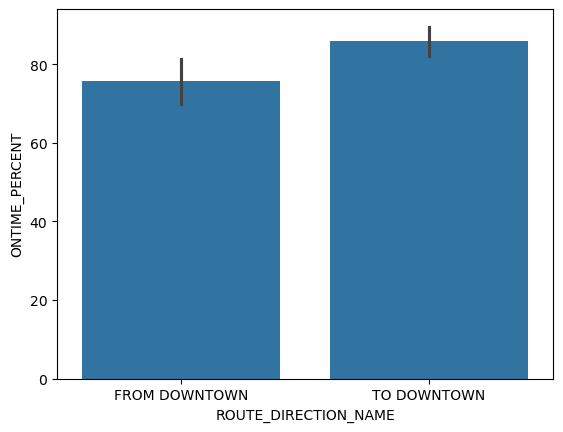

In [30]:
sns.barplot(x = 'ROUTE_DIRECTION_NAME', y = 'ONTIME_PERCENT', data = routedf)

In [31]:
on_time_performance = wego[wego['ADJUSTED_ONTIME_COUNT'] == 1] # on-time rows
on_time_performance_pct = round((len(on_time_performance) / len(wego)) * 100, 2) # overall ot performance pct
print("Overall on-time performance is", on_time_performance_pct, "%")
block_count = on_time_performance['BLOCK_ABBR'].value_counts().reset_index()
block_count.columns = ['BLOCK_ABBR', 'on_time_count']
block_count = block_count.sort_values(by='on_time_count', ascending=False) # count on-time per block and calculate percent of total dataset
block_count['percent_of_total'] = round((block_count['on_time_count'] / len(wego)) * 100, 2) # % of total col
block_count

Overall on-time performance is 77.08 %


,BLOCK_ABBR,on_time_count,percent_of_total
0,5003,7134,2.04
1,2310,7002,2.00
2,5004,6884,1.97
3,300,6330,1.81
4,2311,6297,1.80
...,...,...,...
97,5094,37,0.01
98,5690,33,0.01
99,8401,32,0.01
100,8601,31,0.01


C:\Users\user\AppData\Local\Temp\ipykernel_6512\2339061886.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="BLOCK_ABBR", y="percent_of_total",


<Axes: xlabel='BLOCK_ABBR', ylabel='percent_of_total'>

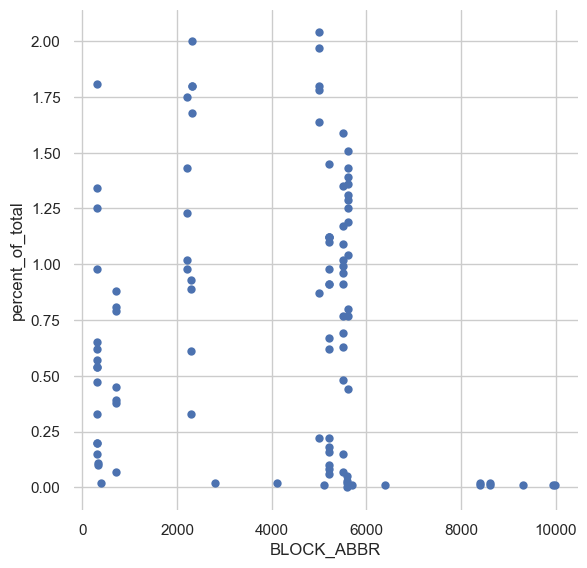

In [32]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="BLOCK_ABBR", y="percent_of_total",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=block_count, ax=ax)

In [33]:
import geopandas as gpd

C:\Users\user\anaconda3\envs\geospatial\Lib\site-packages\pyproj\__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [34]:
zipcodes = gpd.read_file('../data/TIGER_Line_2018_Tennessee_Counties_-7649605106331441140.geojson')
#print(zipcodes.crs)
#print(zipcodes.shape)
#print(zipcodes.columns)
#print(zipcodes.dtypes)
#print(zipcodes.info())
zipcodes.head( )

,OBJECTID,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,30,47,065,01639749,47065,Hamilton,Hamilton County,06,H1,G4020,174,16860,,A,1404654388,86645833,+35.1634720,-085.2018432,"POLYGON ((-85.29255 35.26292, -85.29239 35.263..."
1,65,47,115,01639770,47115,Marion,Marion County,06,H1,G4020,174,16860,,A,1290468301,36484703,+35.1334215,-085.6183990,"POLYGON ((-85.54388 35.30238, -85.54187 35.301..."
2,68,47,185,01639800,47185,White,White County,06,H1,G4020,,,,A,975592113,7113369,+35.9270486,-085.4557854,"MULTIPOLYGON (((-85.64136 35.84077, -85.63988 ..."
3,129,47,129,01639778,47129,Morgan,Morgan County,06,H1,G4020,314,28940,,A,1352439680,823018,+36.1386970,-084.6392616,"POLYGON ((-84.79101 36.05854, -84.79185 36.059..."
4,182,47,013,01639728,47013,Campbell,Campbell County,06,H1,G4020,314,28940,,A,1243615770,46494677,+36.4015922,-084.1592495,"POLYGON ((-84.32222 36.39287, -84.32249 36.393..."


In [35]:
#How does time of day or day of week affect on-time performance?

In [36]:
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [37]:
import datetime

In [38]:
scheduled_day_of_week = wego

In [39]:
scheduled_day_of_week['SCHEDULED_TIME'] = pd.to_datetime(scheduled_day_of_week['SCHEDULED_TIME'])

In [40]:
scheduled_day_of_week['SCHEDULED_DAY'] = scheduled_day_of_week['SCHEDULED_TIME'].dt.day_name()
scheduled_day_of_week['SCHEDULED_DAY']

0          Tuesday
1          Tuesday
2          Tuesday
3          Tuesday
4          Tuesday
            ...   
350324    Saturday
350325    Saturday
350326    Saturday
350327    Saturday
350328    Saturday
Name: SCHEDULED_DAY, Length: 350329, dtype: object

In [41]:
scheduled_day_of_week['ADJUSTED_ONTIME_COUNT'] = wego['ADJUSTED_ONTIME_COUNT'] 
scheduled_day_of_week['ADJUSTED_EARLY_COUNT'] = wego['ADJUSTED_EARLY_COUNT']
scheduled_day_of_week['ADJUSTED_LATE_COUNT'] = wego['ADJUSTED_LATE_COUNT']

In [42]:
scheduled = scheduled_day_of_week.groupby('SCHEDULED_DAY').agg({'ADJUSTED_ONTIME_COUNT': 'sum','ADJUSTED_EARLY_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT':'sum'}).reset_index() #, scheduled_day_of_week['SCHEDULED_DAY'].value_counts()

In [43]:
value_count = scheduled_day_of_week['SCHEDULED_DAY'].value_counts().to_frame().reset_index()

In [44]:
value_count.columns = ['SCHEDULED_DAY', 'TOTAL_ROUTES']

In [45]:
merged_df = pd.merge(scheduled, value_count, on='SCHEDULED_DAY', how='inner')
merged_df

,SCHEDULED_DAY,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,TOTAL_ROUTES
0,Friday,42221,1592,12107,58473
1,Monday,39854,1601,5989,48556
2,Saturday,28986,802,6698,37453
3,Sunday,24554,899,3719,30599
4,Thursday,44059,1574,10642,58454
5,Tuesday,45396,1664,9577,58270
6,Wednesday,44978,1643,10306,58524


In [46]:
SCHEDULED_DAY = ([1,5,6,4,0,2,3])
merged_df = merged_df.reindex(SCHEDULED_DAY)
merged_df

,SCHEDULED_DAY,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,TOTAL_ROUTES
1,Monday,39854,1601,5989,48556
5,Tuesday,45396,1664,9577,58270
6,Wednesday,44978,1643,10306,58524
4,Thursday,44059,1574,10642,58454
0,Friday,42221,1592,12107,58473
2,Saturday,28986,802,6698,37453
3,Sunday,24554,899,3719,30599


In [47]:
merged_df['ONTIME_PERCENT'] = round((merged_df['ADJUSTED_ONTIME_COUNT'] / merged_df['TOTAL_ROUTES']) * 100, 2)
#on time as a percent 

merged_df[['SCHEDULED_DAY', 'ADJUSTED_ONTIME_COUNT', 'TOTAL_ROUTES', 'ONTIME_PERCENT']]

,SCHEDULED_DAY,ADJUSTED_ONTIME_COUNT,TOTAL_ROUTES,ONTIME_PERCENT
1,Monday,39854,48556,82.08
5,Tuesday,45396,58270,77.91
6,Wednesday,44978,58524,76.85
4,Thursday,44059,58454,75.37
0,Friday,42221,58473,72.21
2,Saturday,28986,37453,77.39
3,Sunday,24554,30599,80.24


<Axes: xlabel='SCHEDULED_DAY', ylabel='ONTIME_PERCENT'>

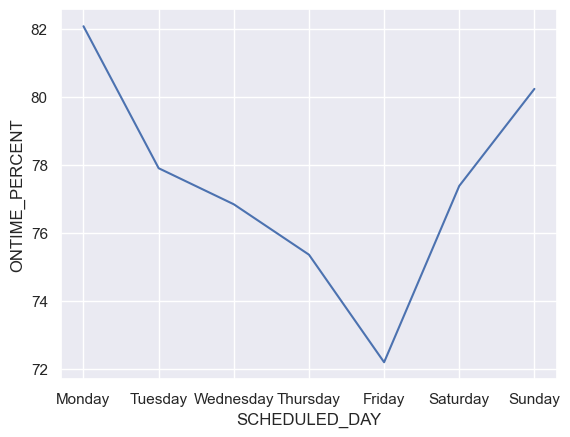

In [48]:
sns.set_theme(style="darkgrid")
sns.lineplot(x="SCHEDULED_DAY", y="ONTIME_PERCENT", data = merged_df)

In [49]:
#How much of a factor does the driver have on on-time performance? The driver is indicated by the OPERATOR variable.

In [50]:
on_time_performance = wego[wego['ADJUSTED_ONTIME_COUNT'] == 1] # on-time rows
on_time_performance_pct = round((len(on_time_performance) / len(wego)) * 100, 2) # overall ot performance pct
print("Overall on-time performance is", on_time_performance_pct, "%")
op_count = on_time_performance['OPERATOR'].value_counts().reset_index()
op_count.columns = ['OPERATOR', 'on_time_count']
op_count = op_count.sort_values(by='on_time_count', ascending=False) # count on-time per block and calculate percent of total dataset
op_count['percent_of_total'] = round((op_count['on_time_count'] / len(wego)) * 100, 2) # % of total col
op_count

Overall on-time performance is 77.08 %


,OPERATOR,on_time_count,percent_of_total
0,1266,2522,0.72
1,1133,2505,0.72
2,1147,2439,0.70
3,1927,2317,0.66
4,409,2310,0.66
...,...,...,...
334,235,6,0.00
335,2256,5,0.00
336,56,3,0.00
337,2982,2,0.00


In [51]:
opsum = wego.groupby(['OPERATOR']).agg({'ADJUSTED_ONTIME_COUNT': 'sum','ADJUSTED_EARLY_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT':'sum'}).reset_index()
opsum['TOTAL'] = (opsum['ADJUSTED_ONTIME_COUNT'] + opsum['ADJUSTED_EARLY_COUNT'] + opsum['ADJUSTED_LATE_COUNT'])
#total per row 
opsum['ONTIME_PERCENT'] = round((opsum['ADJUSTED_ONTIME_COUNT'] / opsum['TOTAL']) * 100, 2)
#on time as a percent 
opsum

,OPERATOR,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,TOTAL,ONTIME_PERCENT
0,0,1,0,0,1,100.00
1,56,3,0,0,3,100.00
2,235,6,1,5,12,50.00
3,244,20,0,5,25,80.00
4,301,19,1,17,37,51.35
...,...,...,...,...,...,...
336,3149,76,4,8,88,86.36
337,3156,219,0,71,290,75.52
338,3165,12,0,20,32,37.50
339,3166,32,0,3,35,91.43


In [52]:
#weighted average of ooperator performance 
weighted_avg_operator = ( (opsum['ONTIME_PERCENT'] * opsum['TOTAL']).sum() / opsum['TOTAL'].sum() )
weighted_avg_operator

79.69253965490275

In [53]:
opsum_bytotals = opsum.sort_values(by='TOTAL', ascending=False)
opsum_bytotals.head(5)
#ontime percent of drivers with most experience (most totals of measured time)

,OPERATOR,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,TOTAL,ONTIME_PERCENT
52,1266,2522,75,268,2865,88.03
39,1147,2439,159,88,2686,90.80
38,1133,2505,13,107,2625,95.43
190,2352,2148,216,241,2605,82.46
202,2424,2146,46,325,2517,85.26


In [54]:
opadhere = wego.groupby('OPERATOR')['ADHERENCE'].mean()
opadhere
#looking at ALL operator adherence (not a good source for Players) dont know how often they drove 

OPERATOR
0       8.916666
56     -1.138889
235    -3.947222
244    -3.466666
301    -4.971171
          ...   
3149   -0.993939
3156   -4.489942
3165   -7.501562
3166   -2.473333
3173   -2.591666
Name: ADHERENCE, Length: 341, dtype: float64

In [55]:
most_experience = wego['OPERATOR'].value_counts().head(5).reset_index()
most_experience
#most operator exp 

,OPERATOR,count
0,2352,2970
1,1266,2911
2,1147,2710
3,1133,2625
4,2424,2577


C:\Users\user\AppData\Local\Temp\ipykernel_6512\716658567.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OPERATOR', y='count', data = most_experience, palette ='plasma')


<Axes: xlabel='OPERATOR', ylabel='count'>

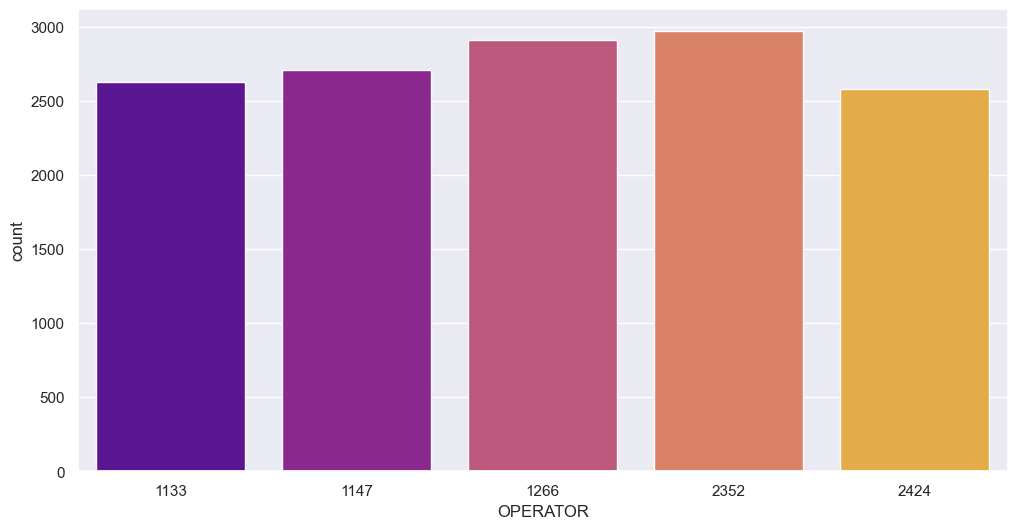

In [56]:
plt.figure(figsize=(12, 6))
sns.barplot(x='OPERATOR', y='count', data = most_experience, palette ='plasma')

<Axes: xlabel='HDWY_DEV', ylabel='ADHERENCE'>

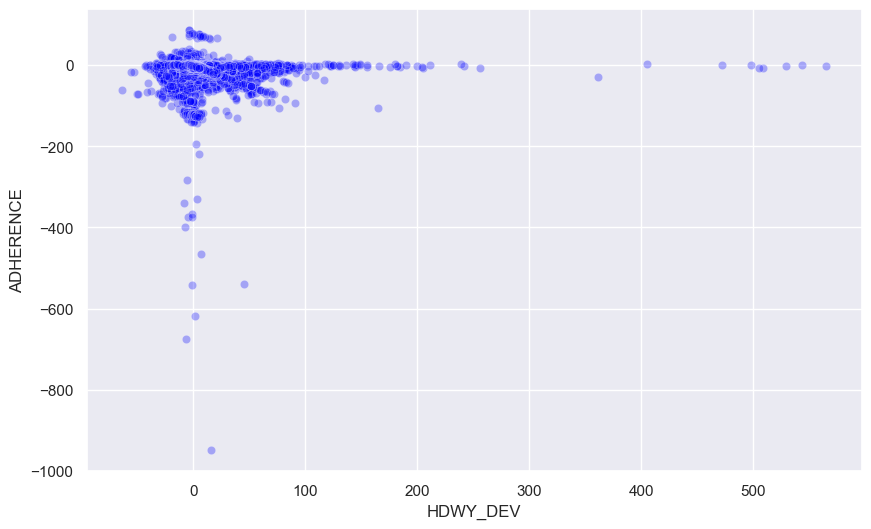

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HDWY_DEV', y='ADHERENCE', data = wego, alpha=0.3, color='blue')

In [58]:
op_routes = wego.groupby('OPERATOR')['ROUTE_ABBR'].unique().to_frame().reset_index()
op_routes

,OPERATOR,ROUTE_ABBR
0,0,[23]
1,56,[56]
2,235,[23]
3,244,[55]
4,301,[55]
...,...,...
336,3149,"[3, 23, 7]"
337,3156,"[50, 3]"
338,3165,[23]
339,3166,[55]


In [59]:
top5drivers = [1266, 1147, 1133, 2352, 2424]
t5_routes = op_routes[op_routes['OPERATOR'].isin(top5drivers)] 
t5_routes

#ROUTES DRIVEN BY MOST EXPERIENCED OPERATORS       question: what do the routes look like?
#get a count of how much they've driven the routes 

,OPERATOR,ROUTE_ABBR
38,1133,[50]
39,1147,[23]
52,1266,[50]
190,2352,"[23, 52, 3]"
202,2424,"[56, 23, 22]"


In [60]:
top5drivers = [1266, 1147, 1133, 2352, 2424]
t5_df = wego[wego['OPERATOR'].isin(top5drivers)]
t5_df.reset_index() 

,index,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,SCHEDULED_DAY
0,742,120230801,1,99458650,2023-08-01,23,2310,1147,345498,0,FROM DOWNTOWN,DWMRT,5.0,1,36.244060,-86.757403,2023-08-01 04:20:00,2023-08-01 04:20:43,2023-08-01 04:20:43,-0.716666,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Tuesday
1,743,120230801,1,99458651,2023-08-01,23,2310,1147,345498,0,FROM DOWNTOWN,EDBC,8.0,0,36.231512,-86.780490,2023-08-01 04:29:00,2023-08-01 04:28:24,2023-08-01 04:28:24,0.600000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Tuesday
2,744,120230801,1,99458652,2023-08-01,23,2310,1147,345498,0,FROM DOWNTOWN,DWMRT,6.0,2,36.244207,-86.760509,2023-08-01 04:38:00,2023-08-01 04:36:10,2023-08-01 04:36:10,1.833333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,Tuesday
3,745,120230801,1,99458653,2023-08-01,23,2310,1147,345499,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-08-01 04:41:00,2023-08-01 04:36:10,2023-08-01 04:43:18,-2.300000,NaN,NaN,NaN,0,0,1,0,0.0,0,7.133333,3.0,Tuesday
4,746,120230801,1,99458654,2023-08-01,23,2310,1147,345499,0,TO DOWNTOWN,DKTL,4.0,0,36.204256,-86.769112,2023-08-01 04:55:00,2023-08-01 04:54:18,2023-08-01 04:54:18,0.700000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13788,349949,120230930,2,100406025,2023-09-30,56,5603,2424,352920,0,FROM DOWNTOWN,GXGRNFLD,9.0,0,36.210070,-86.733544,2023-09-30 23:29:00,2023-09-30 23:37:32,2023-09-30 23:37:32,-8.533333,30.0,35.933333,5.933333,0,1,0,0,0.0,0,0.000000,NaN,Saturday
13789,349950,120230930,2,100406026,2023-09-30,56,5603,2424,352920,0,FROM DOWNTOWN,GXMADISO,10.0,0,36.256567,-86.714100,2023-09-30 23:36:00,2023-09-30 23:47:33,2023-09-30 23:47:33,-11.550000,27.0,37.316666,10.316666,0,1,0,0,0.0,0,0.000000,NaN,Saturday
13790,349951,120230930,2,100406027,2023-09-30,56,5603,2424,352920,0,FROM DOWNTOWN,GXRVRGAT,11.0,0,36.300827,-86.694508,2023-09-30 23:44:00,2023-09-30 23:55:28,2023-09-30 23:55:28,-11.466666,27.0,36.816666,9.816666,0,1,0,0,0.0,0,0.000000,NaN,Saturday
13791,349952,120230930,2,100406028,2023-09-30,56,5603,2424,352920,0,FROM DOWNTOWN,SAMS,12.0,0,36.307973,-86.685963,2023-09-30 23:47:00,2023-09-30 23:57:00,2023-09-30 23:58:58,-11.966666,27.0,38.500000,11.500000,0,1,0,0,0.0,0,1.966666,NaN,Saturday


In [61]:
t5_df.dtypes

CALENDAR_ID                           int64
SERVICE_ABBR                          int64
ADHERENCE_ID                          int64
DATE                                 object
ROUTE_ABBR                            int64
BLOCK_ABBR                            int64
OPERATOR                              int64
TRIP_ID                               int64
OVERLOAD_ID                           int64
ROUTE_DIRECTION_NAME                 object
TIME_POINT_ABBR                      object
ROUTE_STOP_SEQUENCE                 float64
TRIP_EDGE                             int64
LATITUDE                            float64
LONGITUDE                           float64
SCHEDULED_TIME               datetime64[ns]
ACTUAL_ARRIVAL_TIME                  object
ACTUAL_DEPARTURE_TIME                object
ADHERENCE                           float64
SCHEDULED_HDWY                      float64
ACTUAL_HDWY                         float64
HDWY_DEV                            float64
ADJUSTED_EARLY_COUNT            

In [62]:
t5_op_adh = t5_df.groupby('OPERATOR')['ADHERENCE'].mean()
t5_op_adh.reset_index()

,OPERATOR,ADHERENCE
0,1133,-1.184013
1,1147,-0.892399
2,1266,-2.593304
3,2352,-1.764005
4,2424,-2.811707


In [63]:
uniqueroutes = t5_df['ROUTE_ABBR'].unique()
uniqueroutes

array([23, 50, 52,  3, 56, 22], dtype=int64)

In [64]:
route_adh = t5_df.groupby('ROUTE_ABBR')['ADHERENCE'].mean()
route_adh.reset_index()

#route adherence by top 5 data   WHY is rt56 and rt22 so bad?   so looked at count of each route below

,ROUTE_ABBR,ADHERENCE
0,3,-1.943528
1,22,-4.554166
2,23,-1.248814
3,50,-1.919462
4,52,-4.248471
5,56,-4.525375


In [65]:
wego_route_adh = wego.groupby('ROUTE_ABBR')['ADHERENCE'].mean()
wego_route_adh.reset_index()

#route adherence of total dataset (used wego dataframe)

,ROUTE_ABBR,ADHERENCE
0,3,-3.761491
1,7,-3.346555
2,22,-1.138107
3,23,-1.760110
4,50,-2.505022
5,52,-3.971342
6,55,-4.823302
7,56,-2.703988


In [66]:
t5_df['ROUTE_ABBR'].value_counts().reset_index()

,ROUTE_ABBR,count
0,23,6331
1,50,5536
2,56,884
3,3,600
4,52,422
5,22,20


In [67]:
operator_trip_counts = t5_df.groupby('OPERATOR').size().reset_index(name='TOTAL_TRIPS')
operator_trip_counts

,OPERATOR,TOTAL_TRIPS
0,1133,2625
1,1147,2710
2,1266,2911
3,2352,2970
4,2424,2577


In [68]:
operator_trip_counts_sorted = operator_trip_counts.sort_values(by='TOTAL_TRIPS', ascending=False)
operator_trip_counts_sorted

,OPERATOR,TOTAL_TRIPS
3,2352,2970
2,1266,2911
1,1147,2710
0,1133,2625
4,2424,2577


In [69]:
operator_route_counts = (t5_df.groupby(['OPERATOR', 'ROUTE_ABBR']).size().reset_index(name='TRIPS_ON_ROUTE')
                         .sort_values(by='TRIPS_ON_ROUTE', ascending=False))
operator_route_counts
#number of trips per route of individual operators 

,OPERATOR,ROUTE_ABBR,TRIPS_ON_ROUTE
2,1266,50,2911
1,1147,23,2710
0,1133,50,2625
4,2352,23,1948
7,2424,23,1673
8,2424,56,884
3,2352,3,600
5,2352,52,422
6,2424,22,20


In [70]:
route_stats = (operator_route_counts.groupby('OPERATOR').agg({'ROUTE_ABBR': lambda x: list(x), 'TRIPS_ON_ROUTE': 'sum'}).reset_index()
    .rename(columns={'TRIPS_ON_ROUTE': 'TOTAL_TRIPS'}).sort_values(by='TOTAL_TRIPS', ascending=False))
route_stats

,OPERATOR,ROUTE_ABBR,TOTAL_TRIPS
3,2352,"[23, 3, 52]",2970
2,1266,[50],2911
1,1147,[23],2710
0,1133,[50],2625
4,2424,"[23, 56, 22]",2577


In [71]:
route_stats = route_stats.merge(t5_op_adh, on='OPERATOR', how='left')
route_stats
#route_stats.to_csv('route_stats.csv', index=False)


,OPERATOR,ROUTE_ABBR,TOTAL_TRIPS,ADHERENCE
0,2352,"[23, 3, 52]",2970,-1.764005
1,1266,[50],2911,-2.593304
2,1147,[23],2710,-0.892399
3,1133,[50],2625,-1.184013
4,2424,"[23, 56, 22]",2577,-2.811707


In [72]:
t5_df  

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,SCHEDULED_DAY
742,120230801,1,99458650,2023-08-01,23,2310,1147,345498,0,FROM DOWNTOWN,DWMRT,5.0,1,36.244060,-86.757403,2023-08-01 04:20:00,2023-08-01 04:20:43,2023-08-01 04:20:43,-0.716666,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Tuesday
743,120230801,1,99458651,2023-08-01,23,2310,1147,345498,0,FROM DOWNTOWN,EDBC,8.0,0,36.231512,-86.780490,2023-08-01 04:29:00,2023-08-01 04:28:24,2023-08-01 04:28:24,0.600000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Tuesday
744,120230801,1,99458652,2023-08-01,23,2310,1147,345498,0,FROM DOWNTOWN,DWMRT,6.0,2,36.244207,-86.760509,2023-08-01 04:38:00,2023-08-01 04:36:10,2023-08-01 04:36:10,1.833333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,Tuesday
745,120230801,1,99458653,2023-08-01,23,2310,1147,345499,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-08-01 04:41:00,2023-08-01 04:36:10,2023-08-01 04:43:18,-2.300000,NaN,NaN,NaN,0,0,1,0,0.0,0,7.133333,3.0,Tuesday
746,120230801,1,99458654,2023-08-01,23,2310,1147,345499,0,TO DOWNTOWN,DKTL,4.0,0,36.204256,-86.769112,2023-08-01 04:55:00,2023-08-01 04:54:18,2023-08-01 04:54:18,0.700000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349949,120230930,2,100406025,2023-09-30,56,5603,2424,352920,0,FROM DOWNTOWN,GXGRNFLD,9.0,0,36.210070,-86.733544,2023-09-30 23:29:00,2023-09-30 23:37:32,2023-09-30 23:37:32,-8.533333,30.0,35.933333,5.933333,0,1,0,0,0.0,0,0.000000,NaN,Saturday
349950,120230930,2,100406026,2023-09-30,56,5603,2424,352920,0,FROM DOWNTOWN,GXMADISO,10.0,0,36.256567,-86.714100,2023-09-30 23:36:00,2023-09-30 23:47:33,2023-09-30 23:47:33,-11.550000,27.0,37.316666,10.316666,0,1,0,0,0.0,0,0.000000,NaN,Saturday
349951,120230930,2,100406027,2023-09-30,56,5603,2424,352920,0,FROM DOWNTOWN,GXRVRGAT,11.0,0,36.300827,-86.694508,2023-09-30 23:44:00,2023-09-30 23:55:28,2023-09-30 23:55:28,-11.466666,27.0,36.816666,9.816666,0,1,0,0,0.0,0,0.000000,NaN,Saturday
349952,120230930,2,100406028,2023-09-30,56,5603,2424,352920,0,FROM DOWNTOWN,SAMS,12.0,0,36.307973,-86.685963,2023-09-30 23:47:00,2023-09-30 23:57:00,2023-09-30 23:58:58,-11.966666,27.0,38.500000,11.500000,0,1,0,0,0.0,0,1.966666,NaN,Saturday


In [73]:
operator_names = {
    2352: 'Daisy',
    1266: 'Peach',
    1147: 'Luigi',
    1133: 'Mario',
    2424: 'Yoshi'
}

t5_df['OPERATOR_NAME'] = t5_df['OPERATOR'].map(operator_names)

C:\Users\user\AppData\Local\Temp\ipykernel_6512\337736200.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t5_df['OPERATOR_NAME'] = t5_df['OPERATOR'].map(operator_names)


In [74]:
t5_stop_adherence = (
t5_df.groupby(['ROUTE_STOP_SEQUENCE', 'OPERATOR']).agg({'ADJUSTED_EARLY_COUNT': 'sum', 'ADJUSTED_ONTIME_COUNT': 'sum', 'ADJUSTED_LATE_COUNT': 'sum'})) 
t5_stop_adherence

ADJUSTED_EARLY_COUNT  ADJUSTED_ONTIME_COUNT  \
ROUTE_STOP_SEQUENCE OPERATOR                                                
1.0                 2424                         0                      5   
2.0                 1147                         0                    460   
                    2352                         7                    447   
                    2424                         0                    309   
3.0                 1147                        76                    383   
                    2352                        77                    369   
                    2424                        12                    275   
4.0                 1147                        64                    398   
                    2352                        57                    391   
                    2424                        17                    282   
5.0                 1147                        18                    468   
                    2352                        32                    413   
                    2424                         4                    290   
6.0                 1147                         0                    258   
                    2352                         7                    206   
                    2424                         1                    250   
7.0                 1147                         0                    217   
                    2352                        21                    132   
                    2424                         0                    115   
8.0                 1147                         1                    255   
                    2352                         4                    134   
                    2424                         2                    204   
9.0                 2352                         2                     53   
                    2424                         4                    106   
10.0                2352                         4                      2   
                    2424                         1                    107   
11.0                2352                         5                      1   
                    2424                         4                    106   
12.0                1133                         0                    424   
                    1266                         4                    444   
                    2424                         1                     40   
13.0                1133                         0                    421   
                    1266                        15                    414   
                    2424                         0                     54   
14.0                1133                         0                    419   
                    1266                        31                    394   
                    2424                         0                      3   
15.0                1133                        11                    403   
                    1266                        10                    409   
16.0                1133                         2                    409   
                    1266                        11                    408   
17.0                1133                         0                    429   
                    1266                         4                    453   

                              ADJUSTED_LATE_COUNT  
ROUTE_STOP_SEQUENCE OPERATOR                       
1.0                 2424                        1  
2.0                 1147                       18  
                    2352                       25  
                    2424                        2  
3.0                 1147                       15  
                    2352                       33  
                    2424                        6  
4.0                 1147                       16  
                    2352                    

In [75]:
t5_stop_adherence['TOTAL'] = (
t5_stop_adherence['ADJUSTED_EARLY_COUNT'] + t5_stop_adherence['ADJUSTED_ONTIME_COUNT'] + t5_stop_adherence['ADJUSTED_LATE_COUNT']) 
t5_stop_adherence

ADJUSTED_EARLY_COUNT  ADJUSTED_ONTIME_COUNT  \
ROUTE_STOP_SEQUENCE OPERATOR                                                
1.0                 2424                         0                      5   
2.0                 1147                         0                    460   
                    2352                         7                    447   
                    2424                         0                    309   
3.0                 1147                        76                    383   
                    2352                        77                    369   
                    2424                        12                    275   
4.0                 1147                        64                    398   
                    2352                        57                    391   
                    2424                        17                    282   
5.0                 1147                        18                    468   
                    2352                        32                    413   
                    2424                         4                    290   
6.0                 1147                         0                    258   
                    2352                         7                    206   
                    2424                         1                    250   
7.0                 1147                         0                    217   
                    2352                        21                    132   
                    2424                         0                    115   
8.0                 1147                         1                    255   
                    2352                         4                    134   
                    2424                         2                    204   
9.0                 2352                         2                     53   
                    2424                         4                    106   
10.0                2352                         4                      2   
                    2424                         1                    107   
11.0                2352                         5                      1   
                    2424                         4                    106   
12.0                1133                         0                    424   
                    1266                         4                    444   
                    2424                         1                     40   
13.0                1133                         0                    421   
                    1266                        15                    414   
                    2424                         0                     54   
14.0                1133                         0                    419   
                    1266                        31                    394   
                    2424                         0                      3   
15.0                1133                        11                    403   
                    1266                        10                    409   
16.0                1133                         2                    409   
                    1266                        11                    408   
17.0                1133                         0                    429   
                    1266                         4                    453   

                              ADJUSTED_LATE_COUNT  TOTAL  
ROUTE_STOP_SEQUENCE OPERATOR                              
1.0                 2424                        1      6  
2.0                 1147                       18    478  
                    2352                       25    479  
                    2424                        2    311  
3.0                 1147                       15    474  
                    2352                       33    479  
                    2424                        6    293  
4.0                 1147         

In [76]:
t5_stop_adherence['PCT_EARLY'] = t5_stop_adherence['ADJUSTED_EARLY_COUNT'] / t5_stop_adherence['TOTAL']
t5_stop_adherence['PCT_ONTIME'] = t5_stop_adherence['ADJUSTED_ONTIME_COUNT'] / t5_stop_adherence['TOTAL']
t5_stop_adherence['PCT_LATE'] = t5_stop_adherence['ADJUSTED_LATE_COUNT'] / t5_stop_adherence['TOTAL']

In [77]:
t5_stop_adherence[['PCT_EARLY', 'PCT_ONTIME', 'PCT_LATE']] = t5_stop_adherence[['PCT_EARLY', 'PCT_ONTIME', 'PCT_LATE']].round(2)
t5_stop_adherence

ADJUSTED_EARLY_COUNT  ADJUSTED_ONTIME_COUNT  \
ROUTE_STOP_SEQUENCE OPERATOR                                                
1.0                 2424                         0                      5   
2.0                 1147                         0                    460   
                    2352                         7                    447   
                    2424                         0                    309   
3.0                 1147                        76                    383   
                    2352                        77                    369   
                    2424                        12                    275   
4.0                 1147                        64                    398   
                    2352                        57                    391   
                    2424                        17                    282   
5.0                 1147                        18                    468   
                    2352                        32                    413   
                    2424                         4                    290   
6.0                 1147                         0                    258   
                    2352                         7                    206   
                    2424                         1                    250   
7.0                 1147                         0                    217   
                    2352                        21                    132   
                    2424                         0                    115   
8.0                 1147                         1                    255   
                    2352                         4                    134   
                    2424                         2                    204   
9.0                 2352                         2                     53   
                    2424                         4                    106   
10.0                2352                         4                      2   
                    2424                         1                    107   
11.0                2352                         5                      1   
                    2424                         4                    106   
12.0                1133                         0                    424   
                    1266                         4                    444   
                    2424                         1                     40   
13.0                1133                         0                    421   
                    1266                        15                    414   
                    2424                         0                     54   
14.0                1133                         0                    419   
                    1266                        31                    394   
                    2424                         0                      3   
15.0                1133                        11                    403   
                    1266                        10                    409   
16.0                1133                         2                    409   
                    1266                        11                    408   
17.0                1133                         0                    429   
                    1266                         4                    453   

                              ADJUSTED_LATE_COUNT  TOTAL  PCT_EARLY  \
ROUTE_STOP_SEQUENCE OPERATOR                                          
1.0                 2424                        1      6       0.00   
2.0                 1147                       18    478       0.00   
                    2352                       25    479       0.01   
                    2424                        2    311       0.00   
3.0                 1147                       15    474       0.16   
                    2352                       33    479       0.16

In [78]:
t5_stop_adherence = t5_stop_adherence.sort_values(by='PCT_ONTIME', ascending=True) 
t5_stop_adherence
#t5_stop_adherence.to_csv('t5_stop_adherence.csv', index=False)

,,ADJUSTED_EARLY_COUNT,ADJUSTED_ONTIME_COUNT,ADJUSTED_LATE_COUNT,TOTAL,PCT_EARLY,PCT_ONTIME,PCT_LATE
ROUTE_STOP_SEQUENCE,OPERATOR,,,,,,,
11.0,2352,5,1,1,7,0.71,0.14,0.14
10.0,2352,4,2,1,7,0.57,0.29,0.14
12.0,2424,1,40,38,79,0.01,0.51,0.48
13.0,2424,0,54,25,79,0.00,0.68,0.32
8.0,2424,2,204,74,280,0.01,0.73,0.26
6.0,2352,7,206,70,283,0.02,0.73,0.25
14.0,2424,0,3,1,4,0.00,0.75,0.25
9.0,2424,4,106,32,142,0.03,0.75,0.23
11.0,2424,4,106,31,141,0.03,0.75,0.22


In [79]:
avg_pct_ontime = t5_stop_adherence.groupby('OPERATOR')['PCT_ONTIME'].mean().round(2)
avg_pct_ontime.reset_index()
#avg_pct_ontime.to_csv('route_stats.csv', index=False)

,OPERATOR,PCT_ONTIME
0,1133,0.95
1,1147,0.92
2,1266,0.88
3,2352,0.70
4,2424,0.80


In [126]:
mavg_pct_ontime = (
    avg_pct_ontime.reset_index().merge(route_stats, on=['OPERATOR'], how='left')
    .reset_index())
mavg_pct_ontime
mavg_pct_ontime.to_csv('t5_stop_adherence.csv', index=False)

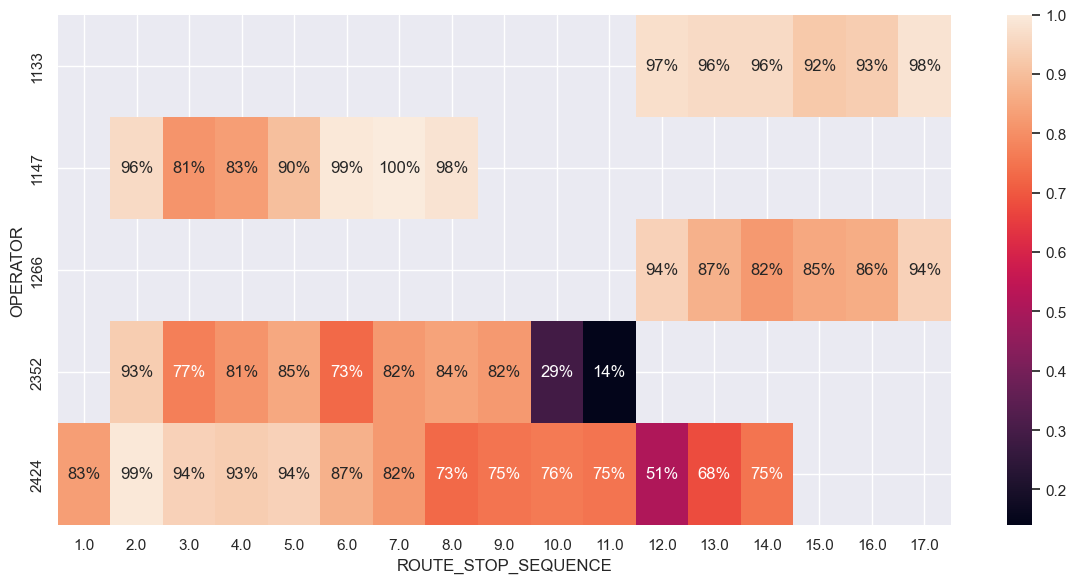

In [81]:
heat_data = t5_stop_adherence.reset_index().pivot(
    index='OPERATOR', columns='ROUTE_STOP_SEQUENCE', values='PCT_ONTIME')

plt.figure(figsize=(12, 6))
#sns.heatmap(heat_data, cmap='YlGnBu', annot=False, vmin=0, vmax=1)
sns.heatmap(heat_data, annot=True, fmt=".0%")
plt.xlabel('ROUTE_STOP_SEQUENCE')
plt.tight_layout()
plt.show()

In [96]:
adherence_avg = (t5_df.groupby(['ROUTE_STOP_SEQUENCE', 'OPERATOR'])['ADHERENCE'].mean()
    .reset_index().rename(columns={'ADHERENCE': 'AVG_ADHERENCE'}))
adherence_avg

,ROUTE_STOP_SEQUENCE,OPERATOR,AVG_ADHERENCE
0,1.0,2424,-2.891666
1,2.0,1147,0.667573
2,2.0,2352,-0.712248
3,2.0,2424,-0.338692
4,3.0,1147,-1.081786
5,3.0,2352,-1.376235
6,3.0,2424,-1.415643
7,4.0,1147,-1.066771
8,4.0,2352,-1.592358
9,4.0,2424,-1.643421


In [98]:
merged_adherence = (
    t5_stop_adherence.reset_index().merge(adherence_avg, on=['ROUTE_STOP_SEQUENCE', 'OPERATOR'], how='left')
    .set_index(['ROUTE_STOP_SEQUENCE', 'OPERATOR']))
merged_adherence
#merged_adherence.to_csv('merged_adherence.csv')

,,ADJUSTED_EARLY_COUNT,ADJUSTED_ONTIME_COUNT,ADJUSTED_LATE_COUNT,TOTAL,PCT_EARLY,PCT_ONTIME,PCT_LATE,AVG_ADHERENCE
ROUTE_STOP_SEQUENCE,OPERATOR,,,,,,,,
11.0,2352,5,1,1,7,0.71,0.14,0.14,1.207143
10.0,2352,4,2,1,7,0.57,0.29,0.14,0.142857
12.0,2424,1,40,38,79,0.01,0.51,0.48,-7.345358
13.0,2424,0,54,25,79,0.00,0.68,0.32,-5.310548
8.0,2424,2,204,74,280,0.01,0.73,0.26,-4.582678
6.0,2352,7,206,70,283,0.02,0.73,0.25,-5.119375
14.0,2424,0,3,1,4,0.00,0.75,0.25,-4.791666
9.0,2424,4,106,32,142,0.03,0.75,0.23,-4.520892
11.0,2424,4,106,31,141,0.03,0.75,0.22,-4.475059


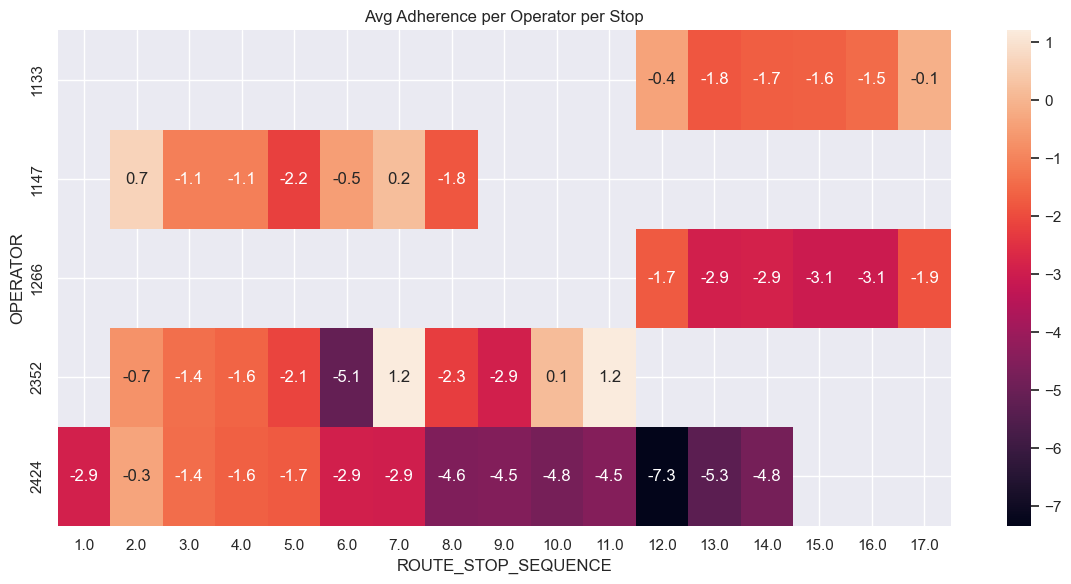

In [104]:
heat_data = merged_adherence.reset_index().pivot(
    index='OPERATOR', columns='ROUTE_STOP_SEQUENCE', values='AVG_ADHERENCE'
)

plt.figure(figsize=(12, 6))
#sns.heatmap(heat_data, cmap='YlGnBu', annot=False, vmin=0, vmax=1)
sns.heatmap(heat_data, annot=True, fmt=".1f")
plt.title('Avg Adherence per Operator per Stop')
plt.xlabel('ROUTE_STOP_SEQUENCE')
plt.ylabel('OPERATOR')
plt.tight_layout()
plt.show()

In [106]:
t5_df['HOUR'] = pd.to_datetime(t5_df['SCHEDULED_TIME']).dt.hour
t5_df 

C:\Users\user\AppData\Local\Temp\ipykernel_6512\3376378187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t5_df['HOUR'] = pd.to_datetime(t5_df['SCHEDULED_TIME']).dt.hour


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,SCHEDULED_DAY,OPERATOR_NAME,HOUR
742,120230801,1,99458650,2023-08-01,23,2310,1147,345498,0,FROM DOWNTOWN,DWMRT,5.0,1,36.244060,-86.757403,2023-08-01 04:20:00,2023-08-01 04:20:43,2023-08-01 04:20:43,-0.716666,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Tuesday,Luigi,4
743,120230801,1,99458651,2023-08-01,23,2310,1147,345498,0,FROM DOWNTOWN,EDBC,8.0,0,36.231512,-86.780490,2023-08-01 04:29:00,2023-08-01 04:28:24,2023-08-01 04:28:24,0.600000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Tuesday,Luigi,4
744,120230801,1,99458652,2023-08-01,23,2310,1147,345498,0,FROM DOWNTOWN,DWMRT,6.0,2,36.244207,-86.760509,2023-08-01 04:38:00,2023-08-01 04:36:10,2023-08-01 04:36:10,1.833333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,Tuesday,Luigi,4
745,120230801,1,99458653,2023-08-01,23,2310,1147,345499,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-08-01 04:41:00,2023-08-01 04:36:10,2023-08-01 04:43:18,-2.300000,NaN,NaN,NaN,0,0,1,0,0.0,0,7.133333,3.0,Tuesday,Luigi,4
746,120230801,1,99458654,2023-08-01,23,2310,1147,345499,0,TO DOWNTOWN,DKTL,4.0,0,36.204256,-86.769112,2023-08-01 04:55:00,2023-08-01 04:54:18,2023-08-01 04:54:18,0.700000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Tuesday,Luigi,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349949,120230930,2,100406025,2023-09-30,56,5603,2424,352920,0,FROM DOWNTOWN,GXGRNFLD,9.0,0,36.210070,-86.733544,2023-09-30 23:29:00,2023-09-30 23:37:32,2023-09-30 23:37:32,-8.533333,30.0,35.933333,5.933333,0,1,0,0,0.0,0,0.000000,NaN,Saturday,Yoshi,23
349950,120230930,2,100406026,2023-09-30,56,5603,2424,352920,0,FROM DOWNTOWN,GXMADISO,10.0,0,36.256567,-86.714100,2023-09-30 23:36:00,2023-09-30 23:47:33,2023-09-30 23:47:33,-11.550000,27.0,37.316666,10.316666,0,1,0,0,0.0,0,0.000000,NaN,Saturday,Yoshi,23
349951,120230930,2,100406027,2023-09-30,56,5603,2424,352920,0,FROM DOWNTOWN,GXRVRGAT,11.0,0,36.300827,-86.694508,2023-09-30 23:44:00,2023-09-30 23:55:28,2023-09-30 23:55:28,-11.466666,27.0,36.816666,9.816666,0,1,0,0,0.0,0,0.000000,NaN,Saturday,Yoshi,23
349952,120230930,2,100406028,2023-09-30,56,5603,2424,352920,0,FROM DOWNTOWN,SAMS,12.0,0,36.307973,-86.685963,2023-09-30 23:47:00,2023-09-30 23:57:00,2023-09-30 23:58:58,-11.966666,27.0,38.500000,11.500000,0,1,0,0,0.0,0,1.966666,NaN,Saturday,Yoshi,23


C:\Users\user\AppData\Local\Temp\ipykernel_6512\3871913169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t5_df['SCHEDULED_TIME_DT'] = pd.to_datetime(t5_df['SCHEDULED_TIME'])
C:\Users\user\AppData\Local\Temp\ipykernel_6512\3871913169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t5_df['WEEKDAY'] = t5_df['SCHEDULED_TIME_DT'].dt.day_name()


<Axes: xlabel='SCHEDULED_TIME_DT', ylabel='ADHERENCE'>

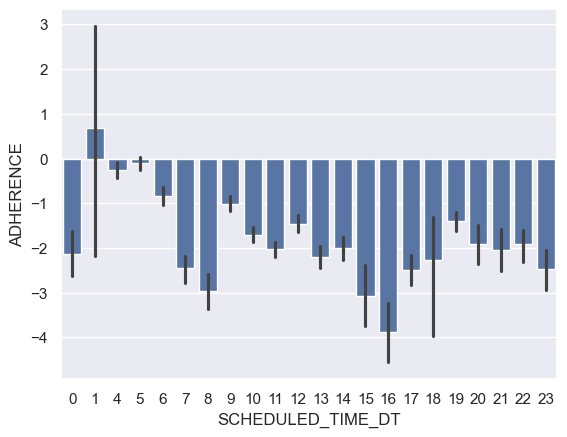

In [108]:
t5_df['SCHEDULED_TIME_DT'] = pd.to_datetime(t5_df['SCHEDULED_TIME'])
t5_df['WEEKDAY'] = t5_df['SCHEDULED_TIME_DT'].dt.day_name()
sns.barplot(data=t5_df, x=t5_df['SCHEDULED_TIME_DT'].dt.hour, y=t5_df['ADHERENCE'])

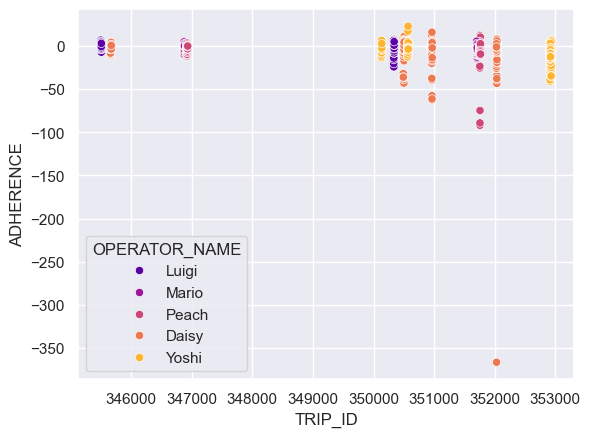

In [109]:
sns.scatterplot(data = t5_df, x = t5_df['TRIP_ID'], y = t5_df['ADHERENCE'], hue=t5_df['OPERATOR_NAME'], palette='plasma')
plt.show()

In [111]:
wego.groupby(['ROUTE_ABBR', 'LATITUDE', 'LONGITUDE']).size().reset_index(name='count')

,ROUTE_ABBR,LATITUDE,LONGITUDE,count
0,3,36.069342,-86.933604,2132
1,3,36.069474,-86.933429,2048
2,3,36.079608,-86.955657,4180
3,3,36.125659,-86.846500,4293
4,3,36.126788,-86.845188,4295
...,...,...,...,...
76,56,36.256567,-86.714100,4992
77,56,36.257412,-86.714068,4972
78,56,36.300470,-86.695610,9962
79,56,36.300827,-86.694508,4992


In [112]:
trips_per_day = (
     t5_df.groupby(['DATE', 'OPERATOR_NAME'])['TRIP_ID']
        .nunique()
        .reset_index(name='UNIQUE_TRIPS')
        .sort_values(by='UNIQUE_TRIPS', ascending = False)
)

trips_per_day


,DATE,OPERATOR_NAME,UNIQUE_TRIPS
142,2023-09-12,Yoshi,20
85,2023-08-27,Daisy,15
110,2023-09-03,Daisy,15
181,2023-09-24,Daisy,15
64,2023-08-20,Daisy,15
...,...,...,...
62,2023-08-19,Daisy,9
171,2023-09-20,Peach,9
38,2023-08-12,Yoshi,9
179,2023-09-23,Daisy,9


In [116]:
tripdata = wego[wego['TRIP_ID'] == 345414]
tripdata


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,SCHEDULED_DAY
428,120230801,1,99458326,2023-08-01,22,2211,2649,345414,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 09:58:00,2023-08-01 09:47:44,2023-08-01 10:00:45,-2.750000,13.0,27.666666,14.666666,0,0,1,0,0.0,0,13.016666,5.0,Tuesday
429,120230801,1,99458327,2023-08-01,22,2211,2649,345414,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 10:09:00,2023-08-01 10:10:16,2023-08-01 10:10:16,-1.266666,13.0,27.183333,14.183333,0,0,1,0,0.0,0,0.000000,NaN,Tuesday
430,120230801,1,99458328,2023-08-01,22,2211,2649,345414,0,FROM DOWNTOWN,25ACLARK,6.0,2,36.186350,-86.816998,2023-08-01 10:15:00,2023-08-01 10:10:41,2023-08-01 10:10:41,4.316666,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,Tuesday
6884,120230802,1,99492215,2023-08-02,22,2211,2649,345414,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-02 09:58:00,2023-08-02 09:52:30,2023-08-02 09:59:22,-1.366666,13.0,13.266666,0.266666,0,0,1,0,0.0,0,6.866666,5.0,Wednesday
6885,120230802,1,99492216,2023-08-02,22,2211,2649,345414,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-02 10:09:00,2023-08-02 10:12:24,2023-08-02 10:12:24,-3.400000,13.0,16.833333,3.833333,0,0,1,0,0.0,0,0.000000,NaN,Wednesday
6886,120230802,1,99492217,2023-08-02,22,2211,2649,345414,0,FROM DOWNTOWN,25ACLARK,6.0,2,36.186350,-86.816998,2023-08-02 10:15:00,2023-08-02 10:13:06,2023-08-02 10:13:06,1.900000,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,Wednesday
13334,120230803,1,99526076,2023-08-03,22,2211,1730,345414,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-03 09:58:00,2023-08-03 09:43:31,2023-08-03 09:59:19,-1.316666,13.0,12.566666,-0.433334,0,0,1,0,0.0,0,15.800000,5.0,Thursday
13335,120230803,1,99526077,2023-08-03,22,2211,1730,345414,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-03 10:09:00,2023-08-03 10:10:06,2023-08-03 10:10:06,-1.100000,13.0,13.450000,0.450000,0,0,1,0,0.0,0,0.000000,NaN,Thursday
13336,120230803,1,99526078,2023-08-03,22,2211,1730,345414,0,FROM DOWNTOWN,25ACLARK,6.0,2,36.186350,-86.816998,2023-08-03 10:15:00,2023-08-03 10:10:34,2023-08-03 10:10:34,4.433333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,Thursday


In [136]:
num_operators = wego['OPERATOR'].nunique()
num_operators

341